In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import linear_model, preprocessing, pipeline, cross_validation
from sklearn import ensemble as skensemble
import scipy.stats
import statsmodels.api as sm
from pprint import pprint

pd.set_option('use_inf_as_null', True)

COL_DESCRIPT = {'MSSubClass': 'numeric',
                'MSZoning': 'categorical',
                'LotFrontage': 'numeric',
                'LotArea': 'numeric',
                'Street': 'categorical',
                'Alley': 'categorical',
                'LotShape': {'Reg': 1, 'IR1': 2, 'IR2': 3, 'IR3': 4},
                'LandContour': 'categorical',
                'Utilities': {'AllPub': 1, 'NoSewr': 2, 'NoSeWa': 3, 'ELO': 4},
                'LotConfig': 'categorical',
                'LandSlope': {'Gtl': 1, 'Mod': 2, 'Sev': 3},
                'Neighborhood': 'categorical',
                'Condition1': 'categorical',
                'Condition2': 'categorical',
                'BldgType': 'categorical',
                'HouseStyle': 'categorical',
                'OverallQual': 'numeric',
                'OverallCond': 'numeric',
                'YearBuilt': 'numeric',
                'YearRemodAdd': 'numeric',
                'RoofStyle': 'categorical',
                'RoofMatl': 'categorical',
                'Exterior1st': 'categorical',
                'Exterior2nd': 'categorical',
                'MasVnrType': 'categorical',
                'MasVnrArea': 'numeric',
                'ExterQual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                'ExterCond': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                'Foundation': 'categorical',
                'BsmtQual': {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                'BsmtCond': {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                'BsmtExposure': {'NA': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
                'BsmtFinType1': {'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
                'BsmtFinSF1': 'numeric',
                'BsmtFinType2': {'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
                'BsmtFinSF2': 'numeric',
                'BsmtUnfSF': 'numeric',
                'TotalBsmtSF': 'numeric',
                'Heating': 'categorical',
                'HeatingQC': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                'CentralAir': 'categorical',
                'Electrical': 'categorical',
                '1stFlrSF': 'numeric',
                '2ndFlrSF': 'numeric',
                'LowQualFinSF': 'numeric',
                'GrLivArea': 'numeric',
                'BsmtFullBath': 'numeric',
                'BsmtHalfBath': 'numeric',
                'FullBath': 'numeric',
                'HalfBath': 'numeric',
                'Bedroom': 'numeric',
                'Kitchen': 'numeric',
                'KitchenQual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                'TotRmsAbvGrd': 'numeric',
                'Functional': 'categorical',
                'Fireplaces': 'numeric',
                'FireplaceQu': {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                'GarageType': 'categorical',
                'GarageYrBlt': 'numeric',
                'GarageFinish': {'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3},
                'GarageCars': 'numeric',
                'GarageArea': 'numeric',
                'GarageQual': {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                'GarageCond': {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                'PavedDrive': {'N': 1, 'P': 2, 'Y': 3},
                'WoodDeckSF': 'numeric',
                'OpenPorchSF': 'numeric',
                'EnclosedPorch': 'numeric',
                '3SsnPorch': 'numeric',
                'ScreenPorch': 'numeric',
                'PoolArea': 'numeric',
                'PoolQC': {'NA': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
                'Fence': {'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4},
                'MiscFeature': 'categorical',
                'MiscVal': 'numeric',
                'MoSold': 'categorical',
                'YrSold': 'numeric',
                'SaleType': 'categorical',
                'SaleCondition': 'categorical'}

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def read_data():
    X  = pd.read_csv(r"C:\Users\piush\Desktop\Dataset\House_Prices\train.csv",index_col=0)
    X_test = pd.read_csv(r"C:\Users\piush\Desktop\Dataset\House_Prices\test.csv", index_col=0)
    return X.drop('SalePrice', axis=1), np.log1p(X['SalePrice']), X_test


def get_ordinal_cols():
    return [c for c in COL_DESCRIPT if isinstance(COL_DESCRIPT[c], dict)]


def get_categorical_cols():
    return [c for c in COL_DESCRIPT if COL_DESCRIPT[c] == 'categorical']


def get_numeric_cols():
    return [c for c in COL_DESCRIPT if COL_DESCRIPT[c] == 'numeric']


def handle_ordinal(X, y, X_test):
    for col in get_ordinal_cols():
        X[col] = X[col].map(lambda x: COL_DESCRIPT[col].get(x, 0))
        X_test[col] = X_test[col].map(lambda x: COL_DESCRIPT[col].get(x, 0))
    return X, y, X_test


def handle_categorical(X, y, X_test):
    catcols = get_categorical_cols()
    # Combine them into one dataset to get the full set of values
    data = pd.concat((X[catcols], X_test[catcols]), axis=0)
    # First we have to ensure that the columns are strings, otherwise get_dummies
    # skips over them for some reason
    for col in catcols:
        X[col] = X[col].astype(str)
        X_test[col] = X_test[col].astype(str)
    data = pd.get_dummies(data, drop_first=True)
    X = pd.concat((X.drop(catcols, axis=1), data.iloc[:X.shape[0], :]), axis=1)
    X_test = pd.concat((X_test.drop(catcols, axis=1), data.iloc[X.shape[0]:, :]), axis=1)
    return X, y, X_test


def deskew_numeric(X, y, X_test):
    HIGH_SKEW = 0.75
    numcols = get_numeric_cols()
    skewed_cols = X.apply(lambda x: scipy.stats.skew(x) >= HIGH_SKEW, axis=0).tolist()
    X.iloc[:, skewed_cols] = np.log1p(X.iloc[:, skewed_cols])
    X_test.iloc[:, skewed_cols] = np.log1p(X_test.iloc[:, skewed_cols])
    return X, y, X_test


def impute_missing(X, y, X_test):
    X = X.fillna(X.mean(axis=0))
    X_test = X_test.fillna(X.mean(axis=0))
    return X, y, X_test


def preprocess_data(X, y, X_test):
    pipeline = [handle_ordinal,
                handle_categorical,
                deskew_numeric,
                impute_missing]
    for func in pipeline:
        X, y, X_test = func(X, y, X_test)
    return X, y, X_test

In [3]:
# Model specific code

def rmse(model, X, y):
    return np.sqrt(np.mean((y - model.predict(X)) ** 2.))


def create_model(X, y, run_cv=False):
    scaler = preprocessing.StandardScaler(with_mean=True, with_std=True)
    #ridge = linear_model.Ridge()
    lasso = linear_model.LassoCV()
    #ranfor = skensemble.RandomForestRegressor()
    model = pipeline.Pipeline([('scaler', scaler),
                               ('lasso', lasso)])
    if run_cv:
        scores = cross_validation.cross_val_score(model, X, y, cv=10, scoring=rmse)
        print('{0:.5f} +/- {1:.5f}'.format(scores.mean(), scipy.stats.sem(scores)))
    return model


def create_submission(model, X, y, X_test):
    model.fit(X, y)
    return pd.DataFrame({'Id': X_test.index, 'SalePrice': np.expm1(model.predict(X_test))})


def get_model_coefs(model):
    if isinstance(model, pipeline.Pipeline):
        print(model.steps[-1][-1].coef_)
        return model.steps[-1][-1].coef_
    return model.coef_


def get_model_intercept(model):
    if isinstance(model, pipeline.Pipeline):
        return model.steps[-1][-1].intercept_
    return model.intercept_


def plot_coeffs(model, colnames):
    coefs = sorted(zip(get_model_coefs(model), colnames),
                   key=lambda x: x[0], reverse=True)
    coefs, cols = zip(*(coefs[:10] + coefs[-10:]))
    sns.barplot(x=coefs, y=cols)
    

def inspect_worst(model, X, y, yhat, n=1, contribution=False):
    if contribution:
        X = get_model_coefs(model) * X
        X['intercept'] = get_model_intercept(model)
    X['error'], X['obs'], X['pred'] = (y - yhat) ** 2., y, yhat
    worst = X.sort_values(by='error').tail(n=n)
    pprint(worst.to_dict(orient='records'))

In [4]:
X, y, X_test = preprocess_data(*read_data())
model = create_model(X, y, run_cv=True)
yhat = create_submission(model, X, y, X_test).to_csv('output.csv', index=False)

0.12718 +/- 0.00690


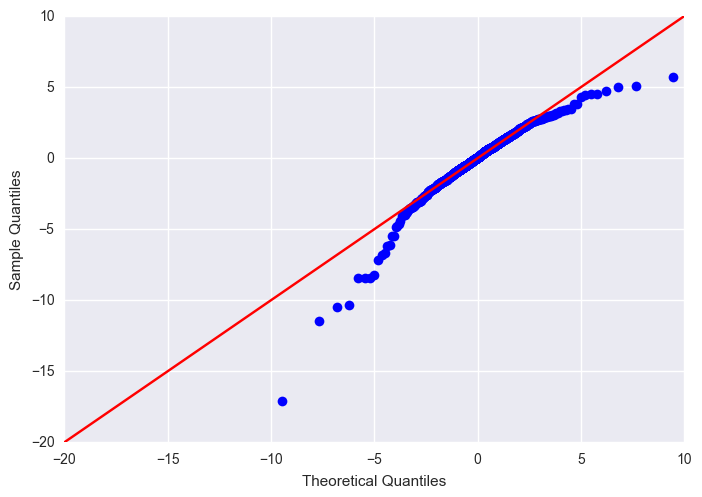

[ -7.21946265e-03  -0.00000000e+00   3.80742105e-02   0.00000000e+00
  -1.24674646e-03   0.00000000e+00   8.05742527e-02   3.91076819e-02
   4.31433674e-02   1.10248365e-02   2.25886426e-03   5.40412573e-03
   0.00000000e+00   1.43525568e-02   0.00000000e+00   1.35071415e-02
   1.63085014e-03   2.47831748e-02   0.00000000e+00   0.00000000e+00
  -0.00000000e+00   0.00000000e+00   1.23632930e-02   2.79182560e-02
  -0.00000000e+00  -0.00000000e+00   1.20123551e-01   1.50854842e-02
   0.00000000e+00   8.55231114e-03   3.99780245e-03  -0.00000000e+00
  -7.38151532e-03   1.70245666e-02   0.00000000e+00   3.83867405e-03
   1.14529840e-02   0.00000000e+00   4.78750715e-03   3.47307162e-02
   3.02049518e-03   0.00000000e+00   0.00000000e+00   1.50630649e-03
   4.98444525e-03   2.54122886e-04   0.00000000e+00   0.00000000e+00
   7.85690699e-03  -0.00000000e+00  -7.48049155e-06  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
   0.00000000e+00   1.23532029e-03

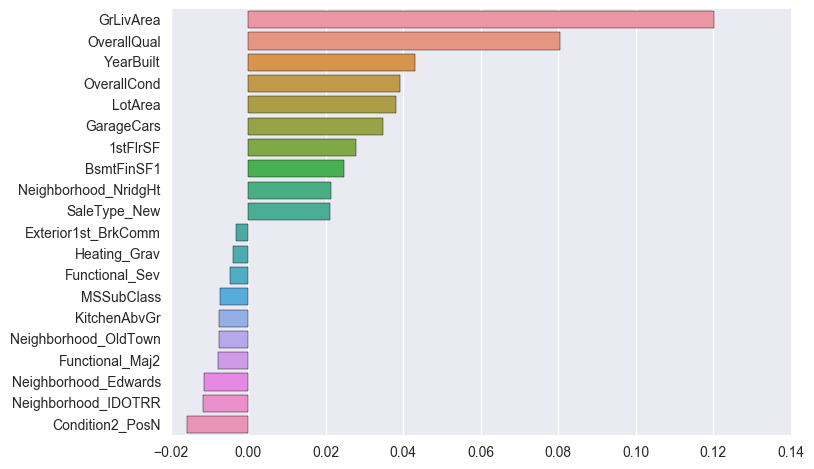

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting functions
def add_percentile(y):
    return y.map(lambda x: np.round(scipy.stats.percentileofscore(y, x) / 25.) * 25.)

# Pair plots
def pairplot(X=None, y=None, cols=None):
    if X is None:
        X, y, X_test = read_data()
    cols = cols or X.columns
    X['percentile'] = add_percentile(y)
    sns.pairplot(X.ix[:, cols + ['percentile']], hue='percentile')

# Q Plot
def qqplot(model, X, y):
    resids = (np.log(y) - np.log(model.predict(X)))
    sm.qqplot(resids, scipy.stats.t, fit=True, line='45')
    plt.show()


X, y, X_test = preprocess_data(*read_data())
model = create_model(X, y)
model.fit(X, y)
qqplot(model, X, y)
yhat = model.predict(X)
#sns.distplot(y - yhat)
X_raw, y_raw, X_test_raw = read_data()
#pairplot(X_raw, y_raw, cols=['WoodDeckSF'])

inspect_worst(model, X, y, yhat, n=2, contribution=True)
plot_coeffs(model, X.columns)
print(np.expm1(y))